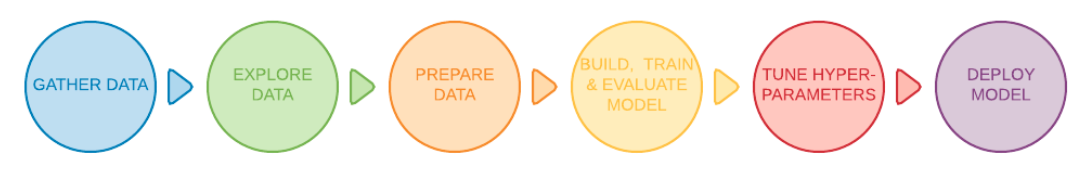

# Dev day 24 November 2023 - Workshop ML

install some dependencies

In [ ]:
%%capture
!pip install fasttext
!pip install scattertext
!pip install matplotlib

# Gather data:
##Import the file and read it into a dataframe

In [ ]:
from google.colab import files

uploaded = files.upload()
# upload workshop file here

Saving workshop_set.csv to workshop_set.csv


Use pandas for data reading and take aquick look:

In [ ]:
import pandas as pd

df = pd.read_csv('workshop_set.csv')

We have our first 'data frame':

In [ ]:
display(df.head(5))
display(df.describe())

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sprinkles-las-vegas-l...,4,9/28/2018,Great customer service! The staff was knowledg...
1,https://www.yelp.com/biz/matcha-cafe-maiko-cha...,4,12/6/2019,I'm so glad they came to Charlotte! I've been ...
2,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,9/7/2020,Manager reached out letting me know that the i...
3,https://www.yelp.com/biz/am%C3%A9lies-french-b...,5,9/14/2019,We were in town for a Wedding. The bride and g...
4,https://www.yelp.com/biz/donut-bar-las-vegas,3,4/3/2018,I don't understand the hype. They taste medioc...


,Rating
count,17906.000000
mean,4.132749
std,1.201913
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Explore Data

Inspect distribution of labels, equal is better

In [ ]:
def print_count_per_ranking(df: pd.DataFrame):
    df['Rating']\
    .value_counts()\
    .plot(kind='bar',figsize=(6,6))

In [ ]:
def even_distribute_hard(df_param: pd.DataFrame) -> pd.DataFrame:
    #even distribute rankings, to minimum count of labels:

    lowest_count = df['Rating'].value_counts().min()
    return df_param.groupby('Rating', group_keys=False).apply(lambda x: x.sample(lowest_count))

def even_distribute_soft(df_param: pd.DataFrame) -> pd.DataFrame:
    #or reduce ranking 5 to even out to remove 6000 items. Still not very equal but less data is taken out of the training set.

    df_subset = df_param.loc[df_param['Rating']==5].sample(n=6000)
    return df_param[~df_param.index.isin(df_subset.index)]

Inspect spread of words per review

In [ ]:
def print_spread_of_text_length(df: pd.DataFrame):
    df['words'] = df['Review Text']\
            .str.strip()\
            .str.split(' ')
    df['word_length'] = df['words'].apply(lambda l: len(l))
    df['word_length'].hist(bins=1000)

Popular words for a label

In [ ]:
def list_words_for_label(df_param: pd.DataFrame, ranking:int=1, label:str='Review Text') -> pd.Series:
    df_param['words'] = df_param[label]\
                .str.strip()\
                .str.split(' ')

    return df_param.value_counts().loc[lambda x: x>4]\
            # .loc[df['Rating']==ranking]\
            # .explode('words')\
            # .groupby('Rating')['words']\
            # .value_counts()\
            # .loc[lambda x: x>4]

Execute one of the above functions

In [ ]:
# print_count_per_ranking(df)

# df_even = even_distribute_soft(df)
# print_count_per_ranking(df_even)

# df = even_distribute_hard(df)
# print_count_per_ranking(df)


# print_spread_of_text_length(df)

# print popular words
list_words_for_label(df, ranking=1).head(20)


TypeError: ignored

## **Visualize the data**

In [ ]:
# import scattertext
# import spacy
# nlp = spacy.load('en_core_web_sm')

# corpus = (scattertext.CorpusFromPandas(df,
#                                            category_col='Rating',
#                                            text_col='Review Text',
#                                            nlp=nlp)
#               .build()
#               .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
#               )
# html = scattertext.produce_scattertext_explorer(
#                    corpus,
#                    category='1',
#                    category_name='Low Rating',
#                    not_category_name='High Rating',
#                    width_in_pixels=1000,
#                    metadata=df['Rating'])
# from IPython.display import IFrame

# file_name = 'scattertextdemo_plot.html'
# open(file_name, 'wb').write(html.encode('utf-8'))
# files.download(file_name)

# Prepare Data

## **Cleaning**
1. case based cleaning
2. remove punctuation
3. remove stop words (words that add nothing)
4. remove unimportant common words
5. inspect good and bad and remove more words

Use panda dataframes to manipulate and create new 'cleaned' columns of the 'Review Text' column. Do one cleaning step at a time to create a new column, then use the latest column for your next cleaning step.

**Useful examples:**

To replace one item for another in an entire column and put the result into a new column:

```
df["newColumn"] = df["textColumn"].str.replace('','')
```

To perform a function on every row in an entire column, e.g. remove all the words in a list:

```
df['newColumn'] = df['textColumn'].apply(lambda row: " ".join(word for word in row.split() if word not in stopwords))
```

To make every word lowercase:
```
df["newColumn"] = df["textColumn"].str.lower()
```

At the end you should have added multiple columns to the dataframe.

In [ ]:
## TO START
df = df_even # enter name of your dataframe

###1. case based cleaning.
make each word in the text lower case.

In [ ]:
## create a new column called 'lowercase'

df["lowercase"] = df["Review Text"].str.lower()


# visualize new rows:
df.loc[:,['lowercase', 'Review Text']].head()

<ipython-input-21-bcc4ebce111b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lowercase"] = df["Review Text"].str.lower()


,lowercase,Review Text
0,great customer service! the staff was knowledg...,Great customer service! The staff was knowledg...
1,i'm so glad they came to charlotte! i've been ...,I'm so glad they came to Charlotte! I've been ...
2,manager reached out letting me know that the i...,Manager reached out letting me know that the i...
3,we were in town for a wedding. the bride and g...,We were in town for a Wedding. The bride and g...
4,i don't understand the hype. they taste medioc...,I don't understand the hype. They taste medioc...


###2. punctuation and regular expression
 can remove unwanted elements such as punctuation using a regular expression.

 handy regular expressions:
 - for punctation [^\w\s]
 - for numbers (\d+)
 - for double spaces (/\s\s+/g)
 - others...

In [ ]:
df["punctuation"] = df['lowercase'].str.replace("[^\w\s]"," ")

# visualize
df.loc[:,['punctuation', 'lowercase', 'Review Text']].head()

<ipython-input-23-ead5ab9bb0bb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["punctuation"] = df['lowercase'].str.replace("[^\w\s]"," ")
<ipython-input-23-ead5ab9bb0bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["punctuation"] = df['lowercase'].str.replace("[^\w\s]"," ")


,punctuation,lowercase,Review Text
0,great customer service the staff was knowledg...,great customer service! the staff was knowledg...,Great customer service! The staff was knowledg...
1,i m so glad they came to charlotte i ve been ...,i'm so glad they came to charlotte! i've been ...,I'm so glad they came to Charlotte! I've been ...
2,manager reached out letting me know that the i...,manager reached out letting me know that the i...,Manager reached out letting me know that the i...
3,we were in town for a wedding the bride and g...,we were in town for a wedding. the bride and g...,We were in town for a Wedding. The bride and g...
4,i don t understand the hype they taste medioc...,i don't understand the hype. they taste medioc...,I don't understand the hype. They taste medioc...


###3. removing stop words
stop words are words that add no significant meaning. Can do this using available dataset, e.g. nltk.

In [ ]:
## 3
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = stopwords.words('english')
display(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# remove stopwords
df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

# visualize
df.loc[:,['stopwords','punctuation', 'lowercase', 'Review Text']].head()

<ipython-input-26-5a0b41381bc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopwords'] = df['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))


,stopwords,punctuation,lowercase,Review Text
0,great customer service staff knowledgeable ope...,great customer service the staff was knowledg...,great customer service! the staff was knowledg...,Great customer service! The staff was knowledg...
1,glad came charlotte one dmv area menu extensiv...,i m so glad they came to charlotte i ve been ...,i'm so glad they came to charlotte! i've been ...,I'm so glad they came to Charlotte! I've been ...
2,manager reached letting know issue resolved wo...,manager reached out letting me know that the i...,manager reached out letting me know that the i...,Manager reached out letting me know that the i...
3,town wedding bride groom arranged progressive ...,we were in town for a wedding the bride and g...,we were in town for a wedding. the bride and g...,We were in town for a Wedding. The bride and g...
4,understand hype taste mediocre best super brea...,i don t understand the hype they taste medioc...,i don't understand the hype. they taste medioc...,I don't understand the hype. They taste medioc...


###4. removing words that are common but not valuable through inspection

inspect the whole dataset for which words are used most, can also inspect common words for each rating.

Then create your own stop word list

In [ ]:
## 4
pd.Series(" ".join(df['stopwords']).split()).value_counts()[:50]


cream         10014
ice            9052
good           5658
place          5598
like           4835
one            4197
get            3820
chocolate      3673
great          3318
cake           3265
try            3175
time           3164
got            3144
go             3002
would          2999
back           2965
flavors        2903
really         2898
sweet          2745
also           2661
love           2489
line           2376
delicious      2365
little         2274
best           2065
coffee         2062
bakery         2046
cookie         2045
milk           2044
flavor         2014
service        1927
definitely     1842
donuts         1790
even           1769
taste          1676
donut          1643
cookies        1608
pretty         1591
tried          1582
order          1552
amazing        1549
well           1548
always         1538
worth          1537
people         1516
nice           1515
first          1488
much           1486
better         1486
vegas          1466


In [ ]:
## create own stop word list
other_stop_words = ...
df['cleaned'] = ....

# visualize
df.loc[:,['cleaned', 'stopwords','punctuation', 'lowercase', 'Review Text']].head()

inspect only certain ratings:

In [ ]:
## 5
# only ratings with value 1
bad_df = df.apply(lambda row: row['cleaned'] if row['Rating']==1 else "", axis=1)
bad_series = pd.Series(" ".join(bad_df).split()).value_counts()[:25]
display(bad_series)

# only ratings with value 5
good_df = df.apply(lambda row: row['cleaned'] if row['Rating']==5 else "", axis=1)
good_series = pd.Series(" ".join(good_df).split()).value_counts()[:25]
display(good_series)



Cleaning and removing stopwords general function

**save final df in a dataframe called df_cleaned, and cleaned data in column 'text_clean'**

In [ ]:
df_cleaned['text_clean'].head(15)


# Build, Train and Evaluate model

## **apply model**
1. put data in right format
2. train

https://fasttext.cc/docs/en/support.html

Fasttext requires the data to be in a specific format.
Each row should contain the following on a single line.
`__labelName__ textData`

Furthermore, we want to reduce the number of labels. Rather than a 5-point scale, we would like to divide them into *negative*, *neutral* and *positive* reviews.

Below we write a function that Code below puts it in that format.

In [ ]:
## put data in right format for fasttext
def map_adjusted_rating(rating):
    if rating in [1, 2]:
        return '__label__negative'
    elif rating == 3:
        return '__label__neutral'
    elif rating in [4, 5]:
        return '__label__positive'

df_cleaned = df
# adjust data
df_cleaned['adjusted_rating'] = df_cleaned['Rating'].apply(lambda x:(map_adjusted_rating(x)))
df_cleaned['fasttext_data'] = df_cleaned['adjusted_rating'] + ' ' + df_cleaned['stopwords']
display(df_cleaned.head(5))

<ipython-input-30-418e9cc09dd2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['adjusted_rating'] = df_cleaned['Rating'].apply(lambda x:(map_adjusted_rating(x)))
<ipython-input-30-418e9cc09dd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['fasttext_data'] = df_cleaned['adjusted_rating'] + ' ' + df_cleaned['stopwords']


,Yelp URL,Rating,Date,Review Text,words,lowercase,punctuation,stopwords,adjusted_rating,fasttext_data
0,https://www.yelp.com/biz/sprinkles-las-vegas-l...,4,9/28/2018,Great customer service! The staff was knowledg...,"[Great, customer, service!, The, staff, was, k...",great customer service! the staff was knowledg...,great customer service the staff was knowledg...,great customer service staff knowledgeable ope...,__label__positive,__label__positive great customer service staff...
1,https://www.yelp.com/biz/matcha-cafe-maiko-cha...,4,12/6/2019,I'm so glad they came to Charlotte! I've been ...,"[I'm, so, glad, they, came, to, Charlotte!, I'...",i'm so glad they came to charlotte! i've been ...,i m so glad they came to charlotte i ve been ...,glad came charlotte one dmv area menu extensiv...,__label__positive,__label__positive glad came charlotte one dmv ...
2,https://www.yelp.com/biz/rewind-ice-cream-boba...,5,9/7/2020,Manager reached out letting me know that the i...,"[Manager, reached, out, letting, me, know, tha...",manager reached out letting me know that the i...,manager reached out letting me know that the i...,manager reached letting know issue resolved wo...,__label__positive,__label__positive manager reached letting know...
3,https://www.yelp.com/biz/am%C3%A9lies-french-b...,5,9/14/2019,We were in town for a Wedding. The bride and g...,"[We, were, in, town, for, a, Wedding., The, br...",we were in town for a wedding. the bride and g...,we were in town for a wedding the bride and g...,town wedding bride groom arranged progressive ...,__label__positive,__label__positive town wedding bride groom arr...
4,https://www.yelp.com/biz/donut-bar-las-vegas,3,4/3/2018,I don't understand the hype. They taste medioc...,"[I, don't, understand, the, hype., They, taste...",i don't understand the hype. they taste medioc...,i don t understand the hype they taste medioc...,understand hype taste mediocre best super brea...,__label__neutral,__label__neutral understand hype taste mediocr...


Let's also write a function that takes a data frame and writes the prepared data column to a line-separated text file.

In [ ]:
def write_to_fasttext_file(data_frame, column_name, file_name: str) -> None:
    with open(file_name,'w') as fout:
        for index, row in data_frame.iterrows():
            fout.write(row[column_name]+"\n")

## **Split data into train, test, validation**

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_and_val_df = train_test_split(df_cleaned, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(test_and_val_df, test_size=0.5, random_state=42)


In [ ]:
display(train_df.head())
display(test_df.head())
display(val_df.head())

,Yelp URL,Rating,Date,Review Text,words,lowercase,punctuation,stopwords,adjusted_rating,fasttext_data
10333,https://www.yelp.com/biz/am%C3%A9lies-french-b...,1,3/16/2016,Visited after clubbin recently. Really nice st...,"[Visited, after, clubbin, recently., Really, n...",visited after clubbin recently. really nice st...,visited after clubbin recently really nice st...,visited clubbin recently really nice staff imp...,__label__negative,__label__negative visited clubbin recently rea...
6907,https://www.yelp.com/biz/carlos-bakery-las-veg...,5,10/6/2020,I was sad to see the poor reviews for Carlos b...,"[I, was, sad, to, see, the, poor, reviews, for...",i was sad to see the poor reviews for carlos b...,i was sad to see the poor reviews for carlos b...,sad see poor reviews carlos bakery one place a...,__label__positive,__label__positive sad see poor reviews carlos ...
8823,https://www.yelp.com/biz/ninety-s-milkshake-ba...,4,8/6/2017,Donut meets ice cream in a heavenly medley! I ...,"[Donut, meets, ice, cream, in, a, heavenly, me...",donut meets ice cream in a heavenly medley! i ...,donut meets ice cream in a heavenly medley i ...,donut meets ice cream heavenly medley got stra...,__label__positive,__label__positive donut meets ice cream heaven...
13755,https://www.yelp.com/biz/carlos-bakery-las-veg...,1,8/18/2021,"This place was unbelievable, not in a good way...","[This, place, was, unbelievable,, not, in, a, ...","this place was unbelievable, not in a good way...",this place was unbelievable not in a good way...,place unbelievable good way customer service p...,__label__negative,__label__negative place unbelievable good way ...
4775,https://www.yelp.com/biz/villanis-bakery-charl...,5,7/10/2020,I visited this bakery today for the first time...,"[I, visited, this, bakery, today, for, the, fi...",i visited this bakery today for the first time...,i visited this bakery today for the first time...,visited bakery today first time living charlot...,__label__positive,__label__positive visited bakery today first t...


,Yelp URL,Rating,Date,Review Text,words,lowercase,punctuation,stopwords,adjusted_rating,fasttext_data
15367,https://www.yelp.com/biz/somisomi-las-vegas-5,3,7/23/2021,Location is now open and was super excited to ...,"[Location, is, now, open, and, was, super, exc...",location is now open and was super excited to ...,location is now open and was super excited to ...,location open super excited visit ice cream co...,__label__neutral,__label__neutral location open super excited v...
9041,https://www.yelp.com/biz/ninety-s-milkshake-ba...,5,10/27/2020,Really unique selections that taste amazing. T...,"[Really, unique, selections, that, taste, amaz...",really unique selections that taste amazing. t...,really unique selections that taste amazing t...,really unique selections taste amazing milksha...,__label__positive,__label__positive really unique selections tas...
10284,https://www.yelp.com/biz/sweet-republic-scotts...,4,2/22/2020,"Great, great, great ice cream! Love the Toffee...","[Great,, great,, great, ice, cream!, Love, the...","great, great, great ice cream! love the toffee...",great great great ice cream love the toffee...,great great great ice cream love toffee binofe...,__label__positive,__label__positive great great great ice cream ...
15950,https://www.yelp.com/biz/melt-phoenix,5,9/2/2016,This place is so cute and the ice cream is ama...,"[This, place, is, so, cute, and, the, ice, cre...",this place is so cute and the ice cream is ama...,this place is so cute and the ice cream is ama...,place cute ice cream amazing offer nice range ...,__label__positive,__label__positive place cute ice cream amazing...
2359,https://www.yelp.com/biz/am%C3%A9lies-french-b...,3,4/12/2016,The atmosphere of the bakery is awesome. When ...,"[The, atmosphere, of, the, bakery, is, awesome...",the atmosphere of the bakery is awesome. when ...,the atmosphere of the bakery is awesome when ...,atmosphere bakery awesome walk visually stimul...,__label__neutral,__label__neutral atmosphere bakery awesome wal...


,Yelp URL,Rating,Date,Review Text,words,lowercase,punctuation,stopwords,adjusted_rating,fasttext_data
4780,https://www.yelp.com/biz/handels-homemade-ice-...,4,4/11/2017,"Such a cute, old school type of ice cream shop...","[Such, a, cute,, old, school, type, of, ice, c...","such a cute, old school type of ice cream shop...",such a cute old school type of ice cream shop...,cute old school type ice cream shop ton flavor...,__label__positive,__label__positive cute old school type ice cre...
2995,https://www.yelp.com/biz/sweet-republic-scotts...,4,6/22/2008,Wow...what a great dessert spot. I went tonigh...,"[Wow...what, a, great, dessert, spot., I, went...",wow...what a great dessert spot. i went tonigh...,wow what a great dessert spot i went tonigh...,wow great dessert spot went tonight gabi k rai...,__label__positive,__label__positive wow great dessert spot went ...
4462,https://www.yelp.com/biz/carlos-bakery-las-veg...,2,4/13/2018,I have debated even writing this review becaus...,"[I, have, debated, even, writing, this, review...",i have debated even writing this review becaus...,i have debated even writing this review becaus...,debated even writing review situation tainted ...,__label__negative,__label__negative debated even writing review ...
1044,https://www.yelp.com/biz/pages-pittsburgh,3,4/23/2017,"I'm definitely a minority, because I didn't fi...","[I'm, definitely, a, minority,, because, I, di...","i'm definitely a minority, because i didn't fi...",i m definitely a minority because i didn t fi...,definitely minority find ice cream particularl...,__label__neutral,__label__neutral definitely minority find ice ...
16257,https://www.yelp.com/biz/prestis-bakery-cleveland,5,12/8/2016,"If you're in Little Italy, there a plethora of...","[If, you're, in, Little, Italy,, there, a, ple...","if you're in little italy, there a plethora of...",if you re in little italy there a plethora of...,little italy plethora delicious choices lunch ...,__label__positive,__label__positive little italy plethora delici...


In [ ]:
write_to_fasttext_file(train_df, "fasttext_data", "data.train")
write_to_fasttext_file(test_df, "fasttext_data", "data.test")
write_to_fasttext_file(val_df, "fasttext_data", "data.valid")

In [ ]:
!head data.train

__label__negative visited clubbin recently really nice staff impressed anything friend purchased
__label__positive sad see poor reviews carlos bakery one place always make sure stop sweet tooth vegas always order original cannolis alittle pricey getting quality dessert vegas really cheap nothing good paid way bad cannolis good ones say absolutely love cannolis always stop matter far away strip carlos brought friends rave place enough always busy cute place stop look staff friendly helpful even huge sweet person think cannoli right amount sweet sweet sweet enough
__label__positive donut meets ice cream heavenly medley got strawberry shortcake bun amazing especially heat bun husband ordered strawberry shortcake milkshake fixings watching make cool little pricey ice cream worth
__label__negative place unbelievable good way customer service poor legitimate complaint nothing instead pointed sales final recipe give us ordered cheesecake strawberry preserve old strawberry top rotted looked li

**Train with default parameters**:

In [ ]:
import fasttext
model_classification = fasttext.train_supervised(input='data.train')


**Test the trained model and print the statistics**

In [ ]:
def print_results(model_output):
    num_records, precision, recall = model_output
    f1 = 2 * (precision * recall) / (precision + recall)

    print("records\t{}".format(num_records))
    print("Precision\t{:.3f}".format(precision))
    print("Recall\t{:.3f}".format(recall))
    print("F1\t{:.3f}".format(f1))
    print()

In [ ]:
result = model_classification.test("data.test")
print_results(result)

records	1786
Precision	0.786
Recall	0.786
F1	0.786



Predict some custom reviews using .predict

In [ ]:
model_classification.predict("cake")

(('__label__positive',), array([0.70569974]))

# Training hyperparameters

**Let's try changing some parameters and training again**


In [ ]:
model_2grams = fasttext.train_supervised(input="data.train", epoch=15)

Has performance on the test set improved?



In [ ]:
result = model_2grams.test("data.test")
print_results(result)

records	1786
Precision	0.787
Recall	0.787
F1	0.787



Try it yourself -- play around with some of the parameters for the train_supervised method:
https://fasttext.cc/docs/en/python-module.html#train_supervised-parameters

What about the validation set we created earlier? We can use it to autotune the hyperparameters.

In [ ]:
model_autotuned = fasttext.train_supervised(input="data.train",autotuneValidationFile="data.valid")

In [ ]:
result = model_autotuned.test("data.test")
print_results(result)

records	1786
Precision	0.789
Recall	0.789
F1	0.789



Now we will give you the gold test set... good luck.

In [ ]:
from google.colab import files

uploaded = files.upload()
# upload workshop file here
df = pd.read_csv('workshop_test_set.csv')